# MOVIE RATING PREDICTION

**Project Overview**

- The Movie Rating Prediction project involves analyzing a dataset containing information about Indian movies. The dataset includes details like movie name, year, duration, genre, rating, votes, director, and three main actors. 

- The data will be used to build a predictive model for movie ratings and extract valuable insights from the movie industry.

**Objectives**

- Develop a predictive model: Create a machine learning model to predict movie ratings based on the provided dataset.

- This is essentially a regression problem, where we aim to estimate the numerical movie ratings based on various features.

- Identify influential factors: Analyze the dataset to determine which factors (e.g., genre, director, actors) have the most significant impact on movie ratings.

- Provide actionable insights: Offer insights to the film industry stakeholders to make informed decisions about movie production, casting, and marketing.

In [41]:
# Importing Required Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")

To build a model in order to predict fraudulent transactions, we can follow these steps:

1.Data Preprocessing: Handle missing values, scale features, etc.

2.Exploratory Data Analysis (EDA): Understand data distributions, relationships, and imbalances.

3.Model Selection and Training: Choose and train machine learning models.

4.Model Evaluation: Evaluate model performance using appropriate metrics.

In [42]:
imdb = pd.read_csv(r"S:\CODSOFT\IMDb Movies India.csv" ,  encoding='cp1252')

# 1. Data Preprocessing

In [43]:
imdb.shape

(15509, 10)

In [44]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [45]:
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [46]:
imdb.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [47]:
imdb.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [48]:
imdb.isnull().sum()[imdb.isnull().sum()>0]

Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [49]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(imdb)
result

,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [50]:
imdb.drop(['Actor 2' , 'Actor 3' ], axis=1, inplace=True)
imdb.dropna(subset=['Duration', 'Rating', 'Votes'], inplace = True)

In [51]:
director_counts = imdb['Director'].value_counts().sort_values(ascending=False)
director_counts

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
                        ..
S. Kumar                 1
Rahul Bhole              1
Sai Kabir                1
Rackhee Sandilya         1
Mozez Singh              1
Name: count, Length: 2549, dtype: int64

In [52]:
imdb['Director'].fillna('rajmouli', inplace=True)

In [53]:
genre_counts = imdb['Genre'].value_counts().sort_values(ascending=False)
genre_counts

Genre
Drama                        870
Drama, Romance               334
Action, Crime, Drama         329
Action, Drama                207
Comedy, Drama                206
                            ... 
Action, Crime, History         1
Romance, Sci-Fi, Thriller      1
Sci-Fi, Thriller               1
Documentary, Musical           1
Romance, Musical, Drama        1
Name: count, Length: 393, dtype: int64

In [54]:
imdb['Genre'].fillna('Action', inplace=True)


In [55]:
actor1_description = imdb['Actor 1'].describe()
actor1_description

count                 5776
unique                2046
top       Amitabh Bachchan
freq                   104
Name: Actor 1, dtype: object

In [56]:
imdb['Actor 1'].fillna('vijay devrakonda', inplace=True)

In [57]:
imdb.Year.value_counts()

Year
(2019)    235
(2017)    221
(2018)    214
(2016)    185
(2015)    184
         ... 
(1945)      3
(1931)      2
(1933)      2
(1932)      2
(1939)      2
Name: count, Length: 91, dtype: int64

In [58]:
imdb['Year'] = imdb['Year'].fillna(2019)

In [59]:
imdb.isnull().sum()[imdb.isnull().sum()>0]

Series([], dtype: int64)

In [60]:
imdb.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra


In [61]:
imdb['Year'] = imdb['Year'].str.replace(r'[()]', '', regex=True)
imdb['Duration'] = imdb['Duration'].str.replace(r' min', '', regex=True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


In [62]:
int_columns = ['Year', 'Duration']
imdb[int_columns] = imdb[int_columns].astype(int)
imdb['Votes'] = imdb['Votes'].str.replace(',', '').astype(int)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int32(3), object(4)
memory usage: 342.8+ KB


# 2. EDA

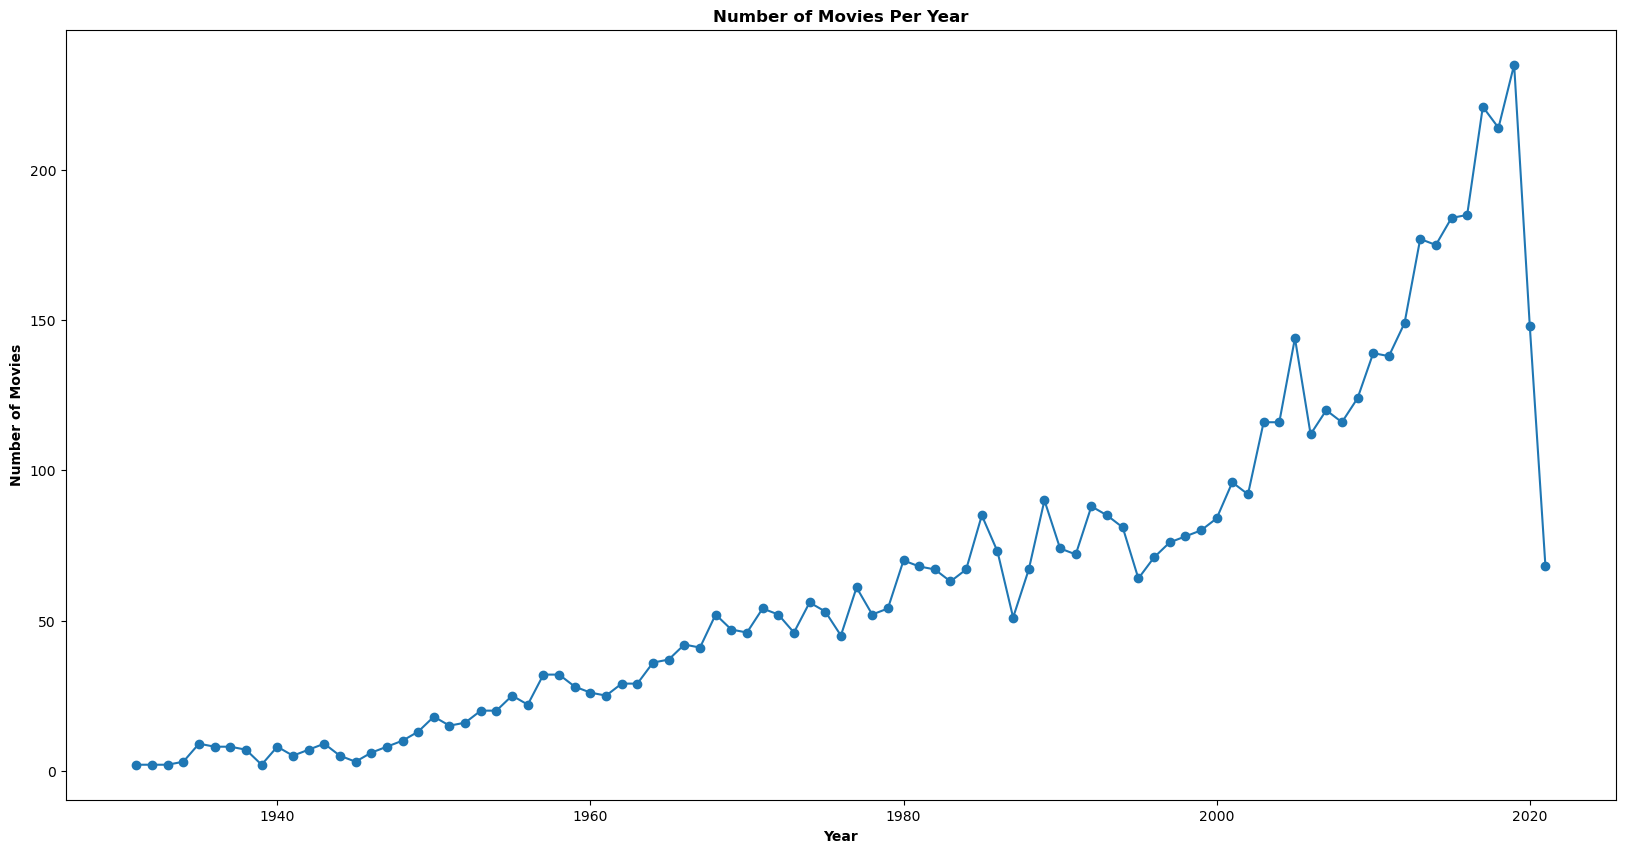

In [63]:
plt.figure(figsize=(20, 10))

year_counts = imdb['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years, year_counts, marker='o' )

plt.title('Number of Movies Per Year' , fontweight = "bold")
plt.xlabel('Year', fontweight = "bold")
plt.ylabel('Number of Movies' , fontweight = "bold")


plt.show()

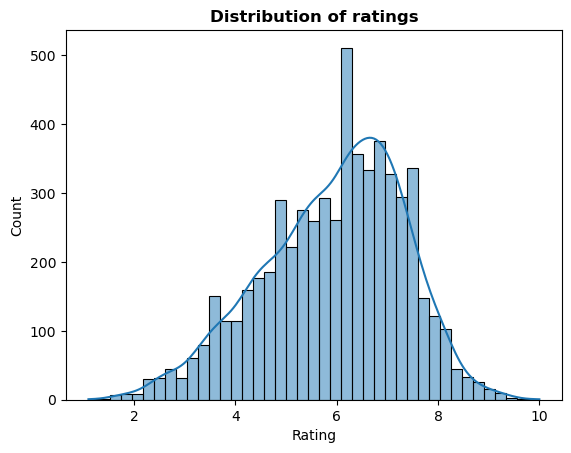

In [64]:
sns.histplot(data=imdb,x='Rating',kde=True)
plt.title('Distribution of ratings' , fontweight = "bold")
plt.show()

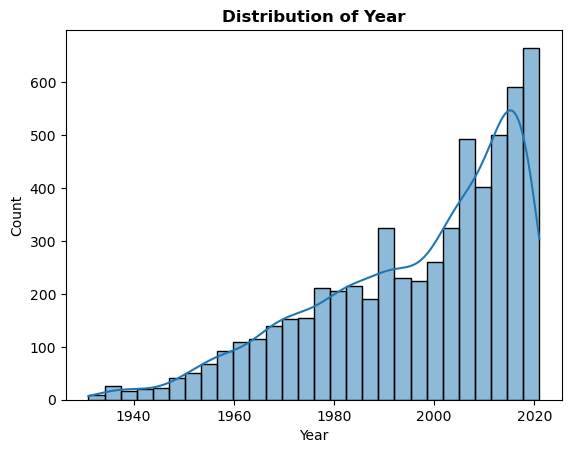

In [65]:
sns.histplot(data=imdb,x='Year',kde=True)
plt.title('Distribution of Year' , fontweight = "bold")
plt.show()

In [66]:
def TopTenPlot(column):
    global imdb
    imdb[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column) , fontweight = "bold")
    plt.xlabel(column, fontweight = "bold")
    plt.ylabel("Count", fontweight = "bold")
    plt.show()

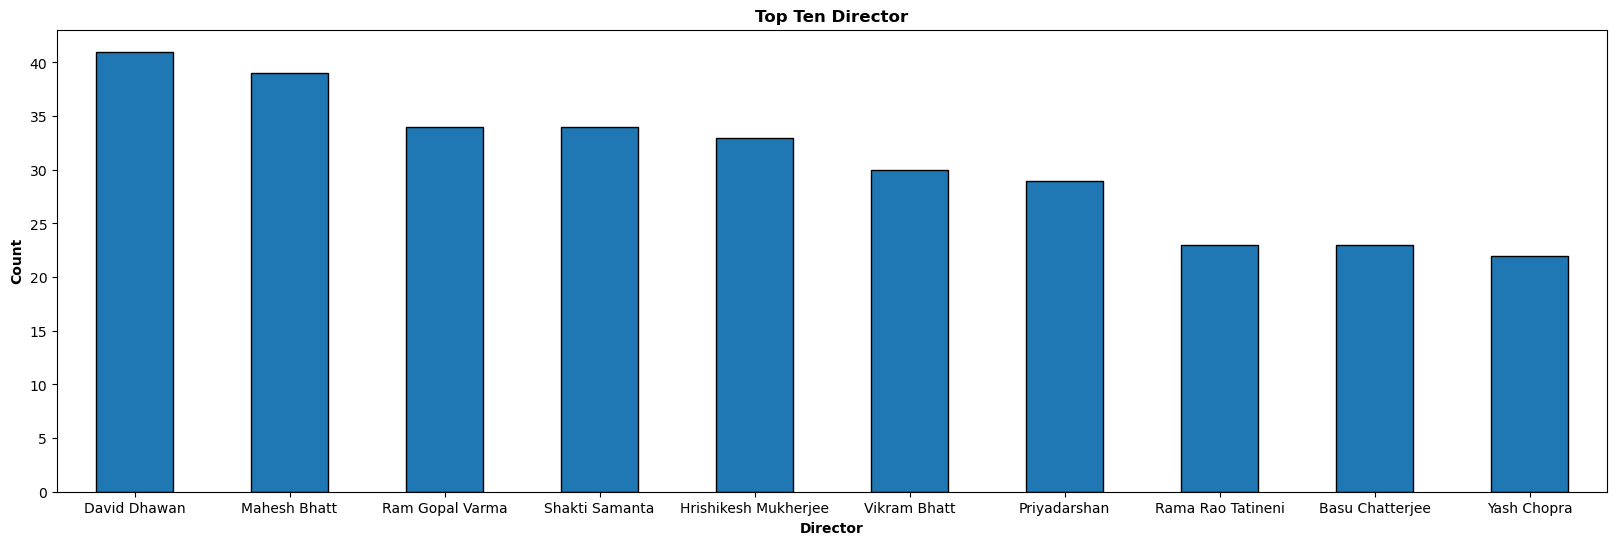

In [67]:
TopTenPlot("Director")

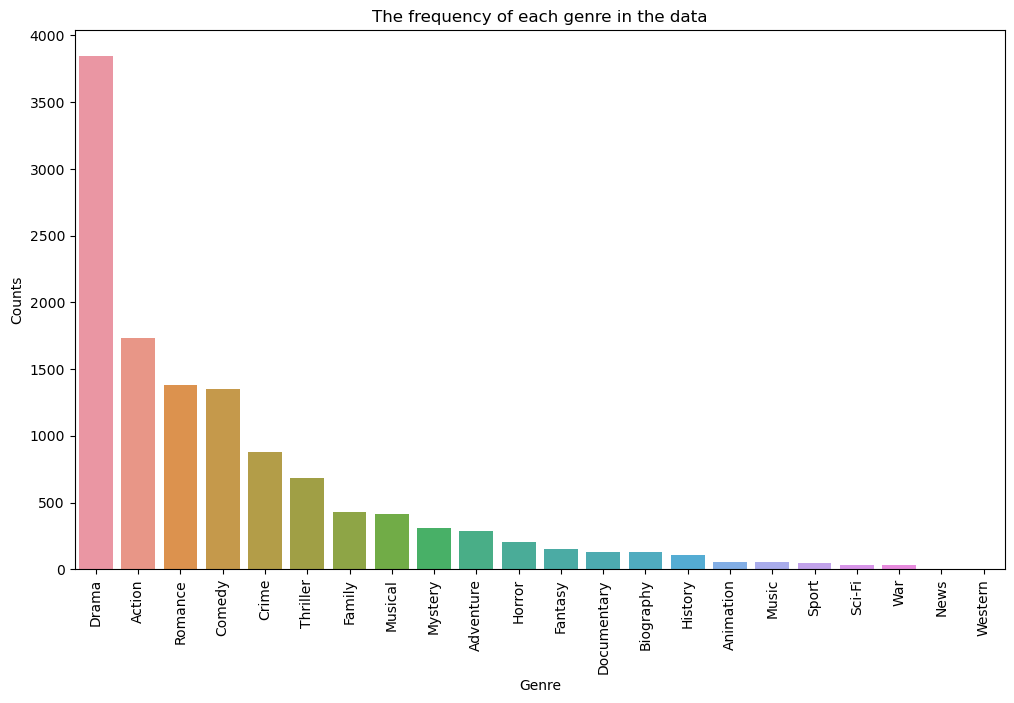

In [68]:
movies_genre = imdb['Genre'].str.split(', ',expand=True).stack().value_counts()
labels = movies_genre.keys()
count = movies_genre.values
plt.figure(figsize=(12,7))
sns.barplot(x=labels,y=count)
plt.xticks(rotation=90)
plt.title('The frequency of each genre in the data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

# 3. Model Selection and training

In [69]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int32(3), object(4)
memory usage: 471.9+ KB


In [70]:
genre_mean_rating = imdb.groupby('Genre')['Rating'].transform('mean')
imdb['Genre_mean_rating'] = genre_mean_rating

In [78]:
imdb['Director_encoded'] = imdb.groupby('Director')['Rating'].transform('mean')
imdb['Actor_encoded'] = imdb.groupby('Actor 1')['Rating'].transform('mean')

# Define the features and target variable
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
X = imdb[features]
y = imdb['Rating']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

In [79]:
error_test = y_test - y_pred 
error_test

3563    -0.885205
2023     0.358322
9526    -0.153328
40       1.210445
1876    -0.386498
           ...   
8313    -0.689375
13908   -0.751718
14373   -0.089011
14490   -2.041565
13028   -0.422870
Name: Rating, Length: 1171, dtype: float64

In [80]:
mse_test = np.mean(np.square(error_test)) 
mse_test

0.5137989360791347

In [81]:
rmse_test = np.sqrt(mse_test) 
rmse_test

0.7167976953639951

In [82]:
mape_test = np.mean(np.abs(error_test * 100 / y_test) )  
mape_test

9.935257302290912

In [83]:
acc_test = 100 - mape_test
acc_test

90.0647426977091

In [89]:
r2 = r2_score(y_test, y_pred)
r2

0.7238406918904581

# 4. Model Evaluation

- From the above predictions we can conclude that the accuracy of the model is around 90% depicting that it is a good model.
- Rsquare = 0.72 means 72% of the X variables are able to explain about Y.